# 📘 Notebook – Fonctions de Clustering et de Prédiction

Ce notebook regroupe les **fonctions utilisées pour le clustering et la prédiction** de la consommation énergétique à partir de données de température et de consommation.

- 📂 Les **chemins des fichiers** (datasets, modèles, etc.) sont définis dans le fichier `files.py`.
- 🧩 Les **fonctions de traitement** (extraction, concaténation, prétraitement, etc.) sont définies dans `fonctions.py`.

Ce document permet de **documenter brièvement chaque fonction**

# <span style="color:red;">🔧 Fonctions:</span>

## <span style="color:orange;"> **extract_and_concat_consommation**</span> :

<span style="color:blue;">**Utilité**</span> :  
Extrait une colonne de consommation (chauffage ou climatisation) pour une ville principale (`toulouse`, `seville` ou `zurich`) et ses périphéries, puis les concatène dans un seul DataFrame.

<span style="color:blue;">**Paramètres** </span> :  
- `ville_principale` : nom de la ville principale (`"toulouse"`, `"seville"` ou `"zurich"`).
- `column_index` : index de la colonne à extraire :
  - `4` pour le chauffage
  - `5` pour la climatisation
- `prefix` : préfixe utilisé pour nommer le DataFrame final (ex. `consommation_heat_` → `consommation_heat_toulouse`).
  
<span style="color:blue;">**Retour** </span> :   
Un DataFrame contenant les colonnes concaténées des fichiers de la ville principale et ses périphéries, accessible par le nom suivant :  
`consommation_` + `heat` ou `cool` + `_` + `ville_principale` (par exemple, `consommation_heat_toulouse` ou `consommation_cool_seville`).

## <span style="color:orange;"> **extract_and_combine_all**</span> :  


<span style="color:blue;">**Utilité**</span> :  
Cette fonction crée des DataFrames de données météorologiques pour chaque groupe de villes, en combinant les données de la ville principale et ses périphéries. Les colonnes extraites comprennent les informations suivantes :
- "Text_" : colonne 1
- "Hum_" : colonne 3
- "Wind_" : colonne 4
- "Solar_" : colonne 5
- "Ground_" : colonne 10

<span style="color:blue;">**Paramètres**</span> :  
- `ville_principale` : nom de la ville principale (`"toulouse"`, `"seville"` ou `"zurich"`).
- `prefix` :column du  préfixe utilisé dans le csv initial  pour former des df monovarier les DataFrames (ex. `Text_`, `Hum_`, `Wind_`, etc.).

<span style="color:blue;">**Retour**</span> :  
Des DataFrames sont créés avec un nom comme `Text_combined_villeprincipale` pour chaque type de donnée (par exemple, `Text_combined_toulouse`, `Hum_combined_seville`, etc.). Ces DataFrames combinent les données des villes principales et de leurs périphéries.



## <span style="color:orange;">**clustering_par_partie**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction permet de diviser les données de consommation énergétique en parties égales selon le nombre de partitions (`n_parts`). ⚠️ Si `n_parts = 1`, le clustering est effectué sur l'ensemble de la journée (sans partitionnement). Sinon, l'algorithme de clustering est appliqué sur chaque partie de la journée. 


<span style="color:blue;">**Paramètres**</span> :  
- `df` : DataFrame avec 24 colonnes horaires (0 à 23) représentant les données horaires sur une journée.
- `n_parts` : Nombre de parties dans lesquelles diviser la journée (1 = pas de partition, autrement il y a plusieurs parties à analyser).
- `status_column` : Colonne indiquant si le chauffage est activé (valeur de 1 pour activé, 0 pour non activé).
- `n_clusters_list` : Liste du nombre de clusters à appliquer pour chaque partie. La taille de la liste doit être égale à `n_parts` et chaque valeur correspond au nombre de clusters pour chaque partie (exemple : `[3]` pour une seule partition, `[3, 2]` pour deux partitions).

<span style="color:blue;">**Retour**</span> :  
Un DataFrame avec les résultats du clustering appliqué à chaque partie de la journée. 
Un DataFrame avec les résultats du clustering appliqué à chaque partie de la journée. Les colonnes de clustering sont de la forme clusters_ + numéro de partition. ⚠️ Si aucune partition n'est utilisée, la colonne sera nommée clusters_1

## <span style="color:orange;">**add_profil_and_status**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction permet d'ajouter la colonne `status_col` ainsi que les colonnes de profils `profil_cols` de `conso_df` à `input_df`. Elle est utilisée pour enrichir un DataFrame de base avec les résultats du clustering (par exemple, le statut de chauffage et les profils de consommation).

<span style="color:blue;">**Paramètres**</span> :  
- `input_df` : DataFrame de base, tel que `Text_combined_toulouse`.
- `conso_df` : DataFrame résultant du clustering, tel que `clustering_heat_toulouse`.
- `status_col` : Colonne indiquant le statut (par défaut `heat_on`).
- `profil_cols` : Une chaîne (ex. `"clusters_1"`) ou une liste (ex. `["clusters_1", "clusters_2", ...]`) des colonnes de profil à ajouter.  
  ⚠️  : Même si vous avez une seule colonne, elle doit être incluse dans une liste.

<span style="color:blue;">**Retour**</span> :  
Un DataFrame contenant les colonnes ajoutées du statut et des profils Par exemple, les colonnes `"heat_on"`, `"clusters_1"`, `"clusters_2"`, etc., seront ajoutées à `input_df`.



## <span style="color:orange;"> **concat_and_create_final_df**</span>

<span style="color:blue;">**Utilité**</span> :  
Concatène plusieurs DataFrames (identifiés par leurs préfixes) pour une ville donnée, afin de former une **entrée multivariée** destinée à un modèle de prédiction.

<span style="color:blue;">**Paramètres**</span> :  
- `city` : nom de la ville principale (ex. `"toulouse"`, `"seville"` ou `"zurich"`).
- `prefixes` : liste des préfixes des DataFrames à concaténer (ex. `["Text", "Solar", "Ground"]`).

<span style="color:blue;">**Retour**</span> :  
Un DataFrame multivarié, résultat de la concaténation des différents DataFrames selon les préfixes fournis.

⚠️ **Le nom du DataFrame final est automatiquement généré** selon la structure :  
`{prefix1}_{prefix2}_..._combined_{city}`  Par exemple : **Text_Solar_Ground_combined_toulouse**




## <span style="color:orange;"> **evaluate_models_split**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction évalue plusieurs modèles de machine learning supervisé en appliquant un split manuel des données (80% pour l'entraînement par défaut). Elle peut être utilisée pour des tâches de classification multi-label ou multi-class selon que les données sont partitionnées ou non.

<span style="color:blue;">**Modèles utilisés** :</span>
 **Random Forest** , **Logistic Regression** , **SVM**, **KNN** ,**Gradient Boosting** 

<span style="color:blue;">**Paramètres** :</span>
- `target_cols` : Liste des colonnes cibles. Si elle contient plusieurs colonnes, c'est un problème de **multi-label**.
- `split_ratio` : Un nombre entre 1 et 10, indiquant le ratio de division des données pour l'entraînement. Par exemple, `split_ratio=8` signifie que 80% des données sont utilisées pour l'entraînement et 20% pour le test.

<span style="color:blue;">**Retour** :</span>  
- Un dictionnaire contenant les métriques de performance pour chaque modèle.
- Un DataFrame avec les vraies valeurs et les prédictions du modèle.

<span style="color:blue;">**Prédictions** :</span>  
- Si les jours sont partitionnés, la fonction effectuera des prédictions **multi-label**.
- Si les jours ne sont pas partitionnés, la fonction effectuera des prédictions **multi-class**.
  
  ⚠️Si des prédictions **multi-label** sont effectuées, il faut fournir en paramètre `models2` au lieu de `models`.






## <span style="color:orange;"> **preprocess_data**</span>

<span style="color:blue;">**Utilité**</span> :  
Prépare les données pour l'entraînement d'un modèle **LSTM de prédiction de consommation énergétique sur 24 heures**.

<span style="color:blue;">**Détails du traitement**</span> :  
- L’**équilibrage** de la classe majoritaire est effectué **uniquement sur les jours prédits** (à t),  
  et **pas sur les jours passés** (à t-1) utilisés comme entrée du modèle.
- La **prédiction** est basée sur :
  - les différentes données d’entrée (ex. température, humidité, etc.) à **t-1**,
  - la consommation réelle à t-1,
  - les profils réels à t-1,
  - les données d’entrée à t et les profils prédits à t.

<span style="color:blue;">**Paramètres**</span> :
- `Text_combined` : DataFrame des données d’entrée,résultat de la fonction   
  - `extract_and_combine_all` (input **monovarié**),  
  - ou `concat_and_create_final_df` (input **multivarié**).
- `clustering_heat` : DataFrame contenant les clusters, généré par la fonction `clustering`.
- `Test_Text_heat` : DataFrame de la **partie test** contenant les **profils reel et  prédits**, généré par `evaluate_models_split`.
- `name_combined` : ⚠️⚠️⚠️ doit être de la forme `input_combined_villeprincipale`,  par exemple **Text_combined_toulouse**, utilisé pour savoir si les **jours sont partitionnés ou non**.




In [147]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [148]:
consommation_chauffage_toulouse = extract_and_concat_consommation(toulouse, column_index=4, prefix="consommation_heat_")
consommation_chauffage_zurich = extract_and_concat_consommation(zurich, column_index=4, prefix="consommation_heat_")
consommation_chauffage_seville = extract_and_concat_consommation(seville, column_index=4, prefix="consommation_heat_")
consommation_climatisation_toulouse = extract_and_concat_consommation(toulouse, column_index=5, prefix="consommation_cool_")
consommation_climatisation_zurich = extract_and_concat_consommation(zurich, column_index=5, prefix="consommation_cool_")
consommation_climatisation_seville = extract_and_concat_consommation(seville, column_index=5, prefix="consommation_cool_")


In [149]:

# Exemple d'utilisation
city_groups = {
    "toulouse": toulouse_meteo,
    "zurich": zurich_meteo,
    "seville": seville_meteo
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

In [150]:
Text_combined_toulouse = combined_data.get('Text_combined_toulouse')
Hum_combined_toulouse = combined_data.get('Hum_combined_toulouse')
Wind_combined_toulouse = combined_data.get('Wind_combined_toulouse')

## Clustering et Prédiction consommation chauffage

- Clustering  d’un profil de 24 heures.
- Prédiction des profils de consommation.
- Prédiction de la consommation sur 24 heures.

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du profil de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Évaluation de Random Forest...


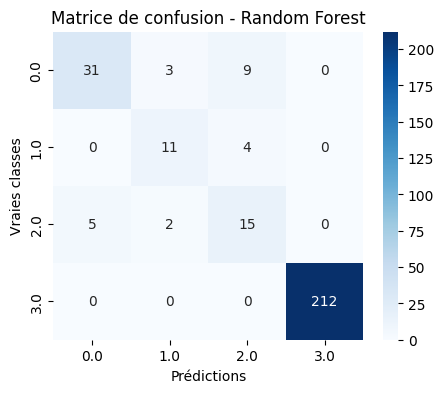

Random Forest - F1: 0.9233 - Accuracy: 0.9212 - Temps: 0.63s
###################################################################

Évaluation de Logistic Regression...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



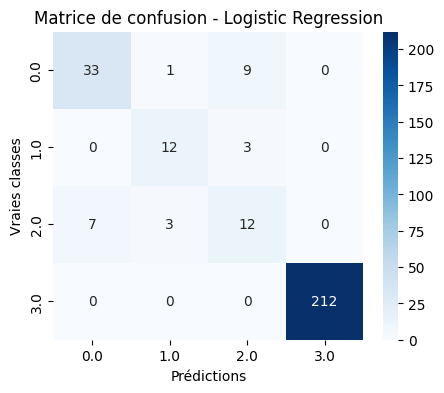

Logistic Regression - F1: 0.9222 - Accuracy: 0.9212 - Temps: 0.62s
###################################################################

Évaluation de SVC...


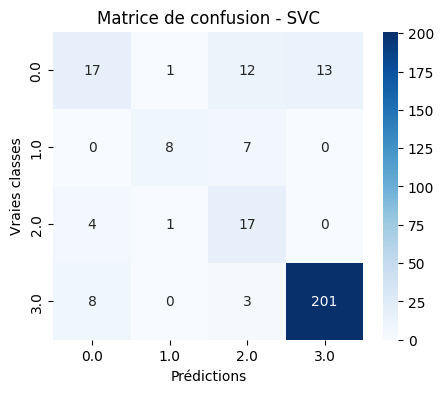

SVC - F1: 0.8295 - Accuracy: 0.8322 - Temps: 0.11s
###################################################################

Évaluation de KNN...


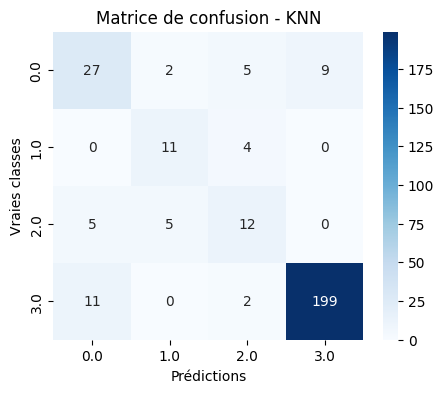

KNN - F1: 0.8549 - Accuracy: 0.8527 - Temps: 0.06s
###################################################################

Évaluation de Gradient Boosting...


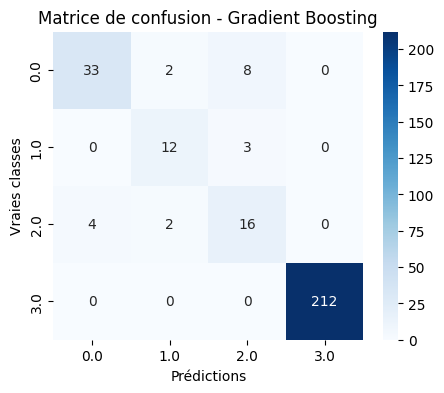

Gradient Boosting - F1: 0.9365 - Accuracy: 0.9349 - Temps: 5.61s
###################################################################
	
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du 24 heures de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prediction based on : Text
Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.8357 - mae: 0.7086 - mse: 0.8357 - val_loss: 0.5685 - val_mae: 0.5376 - val_mse: 0.5685
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4308 - mae: 0.4564 - mse: 0.4308 - val_loss: 0.3812 - val_mae: 0.3743 - val_mse: 0.3812
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2839 - mae: 0.3311 - mse: 0.2839 - val_loss: 0.3179 - val_mae: 0.3250 - val_mse: 0.3179
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2519 - mae: 0.3041 - mse: 0.2519 - val_loss: 0.2562 - val_mae: 0.3016 - val_mse: 0.2562
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2290 - mae: 0.2926 - mse: 0.2290 - val_loss: 0.2233 - val_mae: 0.2738 - val_mse: 0.2233
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1836 - mae: 0.2612 - mse: 0.1836 - val_loss: 0.1921 - val_mae: 0.2560 - val_mse: 0.1921
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1691 - mae: 0.2498 - mse: 0.1691 - val_loss: 0.1624 - va

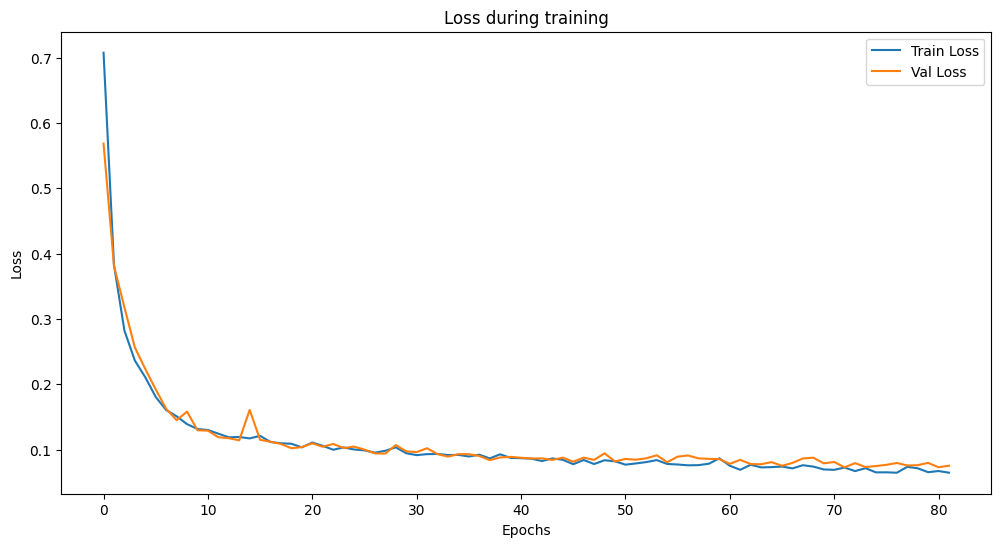

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0752 - mae: 0.1521 - mse: 0.0752
Validation Loss : 0.07271721959114075
Validation MAE: 0.14995096623897552
Validation MSE: 0.07271721959114075
Validation RMSE: 0.26966130532788857
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Test MAE: 131.96508068788725
Test MSE: 54182.10298391763
Test RMSE: 232.77049422965453
Test R²: 0.9403448260512715
Test CVRMSE: 0.3460725220864526


In [151]:
clustering_heat_toulouse = clustering(
    df=consommation_chauffage_toulouse,  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)

Text_conso_heat_tou = add_profil_and_status(
    input_df=Text_combined_toulouse,
    conso_df=clustering_heat_toulouse,
    status_col="heat_on",
    profil_cols=["clusters_1"]
)

print("-"*100)
print("-"*100)
print("Prédiction du profil de consommation de chauffage")
print("-"*100)
print("-"*100)

re, Test_Text_heat_toulouse = evaluate_models_split(
    df=Text_conso_heat_tou,
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)
print("\t")
print("-"*100)
print("-"*100)
print("Prédiction du 24 heures de consommation de chauffage")
print("-"*100)
print("-"*100)

X_train2, X_test2, y_train2, y_test2 , scaler_temp, scaler_cons  = preprocess_data(
    Text_combined_toulouse,
    clustering_heat_toulouse,
    Test_Text_heat_toulouse,
    "Text_combined_toulouse"
)

model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2,
    y_train2,
    X_test2,
    y_test2,
    scaler_temp,
    scaler_cons
)


In [ ]:
clustering_heat_toulouse = clustering(
    df=consommation_chauffage_toulouse,  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)

Text_conso_heat_tou = add_profil_and_status(
    input_df=Text_combined_toulouse,
    conso_df=clustering_heat_toulouse,
    status_col="heat_on",
    profil_cols=["clusters_1"]
)

print("-"*100)
print("-"*100)
print("Prédiction du profil de consommation de chauffage")
print("-"*100)
print("-"*100)

re, Test_Text_heat_toulouse = evaluate_models_split(
    df=Text_conso_heat_tou,
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)
print("\t")
print("-"*100)
print("-"*100)
print("Prédiction du 24 heures de consommation de chauffage")
print("-"*100)
print("-"*100)

X_train2, X_test2, y_train2, y_test2 , scaler_temp, scaler_cons  = preprocess_data(
    Text_combined_toulouse,
    clustering_heat_toulouse,
    Test_Text_heat_toulouse,
    "Text_combined_toulouse"
)

model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2,
    y_train2,
    X_test2,
    y_test2,
    scaler_temp,
    scaler_cons
)


## Clustering et Prédiction consommation chauffage

- Clustering sur 4 profils de 6 heures (au lieu d’un profil de 24 heures).
- Prédiction des profils de consommation.
- Prédiction de la consommation sur 24 heures.

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du profil de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Évaluation de Random Forest...
Random Forest - F1: 0.9871 - Accuracy: 0.9486 - 0/1 Loss: 0.0514 - Hamming Loss: 0.0137 - Temps: 2.19s
###################################################################

Évaluation de Logistic Regression...
Logistic Regression - F1: 0.9765 - Accuracy: 0.9041 - 0/1 Loss: 0.0959 - Hamming Loss: 0.0248 - Temps: 0.39s
###################################################################

Évaluation de SVC...
SVC - F1: 0.9237 - Accuracy: 0.8493 - 0/1 Loss: 0.1507 - Hamming Loss: 0.0839 - Temps: 0.14s
#############

c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8422 - mae: 0.6857 - mse: 0.8422 - val_loss: 0.4916 - val_mae: 0.4698 - val_mse: 0.4916
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3536 - mae: 0.3991 - mse: 0.3536 - val_loss: 0.3607 - val_mae: 0.3565 - val_mse: 0.3607
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3021 - mae: 0.3427 - mse: 0.3021 - val_loss: 0.3027 - val_mae: 0.3232 - val_mse: 0.3027
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2504 - mae: 0.3021 - mse: 0.2504 - val_loss: 0.2582 - val_mae: 0.2950 - val_mse: 0.2582
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2212 - mae: 0.2832 - mse: 0.2212 - val_loss: 0.2220 - val_mae: 0.2729 - val_mse: 0.2220
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1709 - mae: 0.2459 - mse: 0.1709 - val_loss: 0.1927 - val_mae: 0.2509 - val_mse: 0.1927
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1604 - mae: 0.2421 - mse: 0.1604 - val_loss: 0.1604 - v

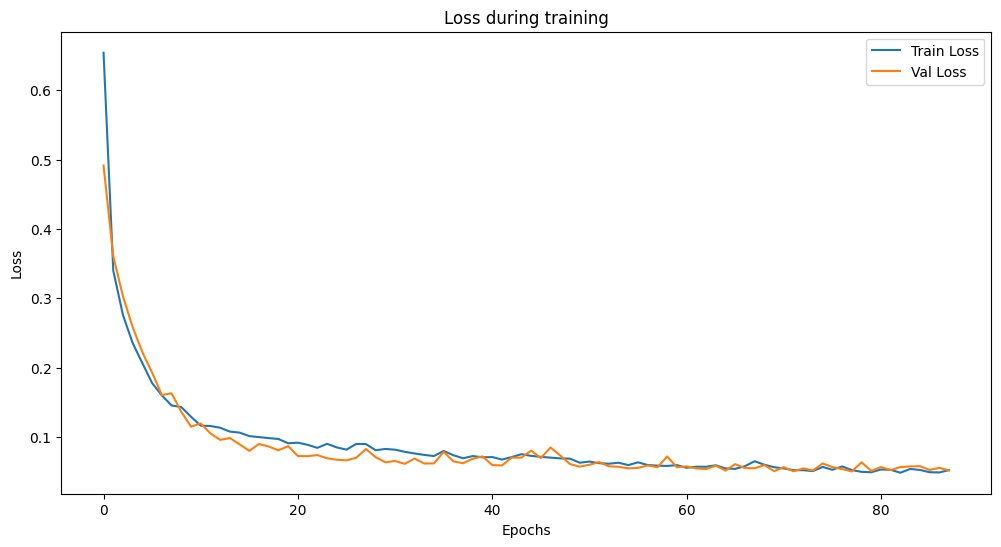

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0522 - mae: 0.1261 - mse: 0.0522
Validation Loss : 0.05021464079618454
Validation MAE: 0.12420140206813812
Validation MSE: 0.05021464079618454
Validation RMSE: 0.22408623517785412
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Test MAE: 117.85114164483218
Test MSE: 43436.39563579685
Test RMSE: 208.4140005752897
Test R²: 0.9535717864523997
Test CVRMSE: 0.3098604015767439


In [152]:
clustering_heat_toulouse_4parties = clustering(
    df=consommation_chauffage_toulouse,  
    n_parts=4,                          
    status_column="heat_on",           
    n_clusters_list=[2,3,3,2]                
)



Text_conso_heat_tou = add_profil_and_status(
    input_df=Text_combined_toulouse,
    conso_df=clustering_heat_toulouse_4parties,
    status_col="heat_on",
    profil_cols=["clusters_1","clusters_2","clusters_3","clusters_4"]
)

print("-"*100)
print("-"*100)
print("Prédiction du profil de consommation de chauffage")
print("-"*100)
print("-"*100)


re, Test_Text_heat_toulouse = evaluate_models_split(
    df=Text_conso_heat_tou,
    target_cols=["clusters_1","clusters_2","clusters_3","clusters_4"],
    models=models2,
    split_ratio=8
)


print("-"*100)
print("-"*100)
print("Prédiction du 24 heures de consommation de chauffage")
print("-"*100)
print("-"*100)

X_train2, X_test2, y_train2, y_test2 , scaler_temp, scaler_cons  = preprocess_data(
    Text_combined_toulouse,
    clustering_heat_toulouse_4parties,
    Test_Text_heat_toulouse,
    "Text_combined_toulouse"
)

model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2,
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_temp, 
    scaler_cons
)

In [42]:
create_line_gif_point_by_point(y_test2, predictions2, scaler_cons)


In [34]:
plot_true_vs_predicted_interactive(indices=[15, 11, 13,32,89], y_test=y_test2, predictions=predictions2, scaler_cons=scaler_cons)


In [35]:

create_line_gif_point_by_point_indices([15, 11, 13,32,89], y_test2, predictions2, scaler_cons, filename="consommation.gif")


In [36]:
def create_line_gif_point_by_point_indices(
    indices,         # liste des indices des jours à tracer
    y_test,
    predictions,
    scaler_cons,
    filename="line_point_by_point.gif"
):
    """
    Crée un GIF où, pour chaque jour (donné dans indices),
    les valeurs réelles et prédites apparaissent point par point,
    en accumulant les jours précédents à l'affichage.
    """
    num_examples = len(indices)

    y_test_rescaled = scaler_cons.inverse_transform(y_test[indices])
    predictions_rescaled = scaler_cons.inverse_transform(predictions[indices])

    fig, ax = plt.subplots(figsize=(12, 6))

    length = y_test_rescaled.shape[1]
    total_frames = num_examples * length

    def update(frame):
        ax.clear()

        example_idx = frame // length  # jour actuel
        point_idx = frame % length     # heure actuelle dans ce jour

        # Initialiser les tableaux cumulés
        cumulative_true = []
        cumulative_pred = []
        cumulative_x = []
        offset = 0

        for i in range(example_idx + 1):
            # On trace toutes les heures précédentes normalement
            if i < example_idx:
                cumulative_true.extend(y_test_rescaled[i])
                cumulative_pred.extend(predictions_rescaled[i])
                cumulative_x.extend(np.arange(length) + offset)
            else:
                # Pour le jour en cours, on ajoute jusqu'au point_idx
                cumulative_true.extend(y_test_rescaled[i][:point_idx + 1])
                cumulative_pred.extend(predictions_rescaled[i][:point_idx + 1])
                cumulative_x.extend(np.arange(point_idx + 1) + offset)
            offset += length

        # Tracé
        ax.plot(cumulative_x, cumulative_true, marker='o', color='blue', label="Valeurs réelles", linestyle='-')
        ax.plot(cumulative_x, cumulative_pred, marker='x', color='orange', label="Prédictions", linestyle='--')

        ax.set_ylabel("Consommation")
        ax.set_xlabel("Heures concaténées")
        ax.set_title(f"Différence entre valeur réelle et prédite de consommation d'énergie - jusqu'à l'heure {point_idx + 1} du jour {example_idx + 1}")
        ax.set_xticks(np.arange(offset))
        ax.set_xticklabels([f"J{i+1}-h{j}" for i in range(example_idx+1) for j in range(length)][:offset], rotation=45)
        ax.legend()
        ax.grid(True, linestyle="--", alpha=0.4)
        ax.set_ylim(0, 5000)  # Limite fixe

    ani = animation.FuncAnimation(fig, update, frames=total_frames, repeat=False)
    ani.save(filename, writer='pillow', fps=2)
    plt.close()


In [37]:
create_line_gif_point_by_point_indices(
    indices=[15, 11, 12],
    y_test=y_test2,
    predictions=predictions2,
    scaler_cons=scaler_cons,
    filename="conso_cumulative.gif"
)
